# 3. Exploiting Correlation

Financial data analysis is not only about processing numbers, but also about understanding how meaningful factors can summarize or represent the data. This section explores the role that correlation and principal components play in this process.

**a.** Generate 5 uncorrelated Gaussian random variables to simulate yield changes (these can be positive or negative, with a mean close to 0 and a small standard deviation).

**b.** Run Principal Component Analysis (PCA) using either the correlation or covariance matrix.

**c.** Write a paragraph explaining how the variances of each component compare with each other. Specifically, address: How much variance is explained by Component 1, Component 2, and Component 3?

**d.** Produce a scree plot ([see Wikipedia](https://en.wikipedia.org/wiki/Scree_plot)) showing the variance explained for each component.

Now, let’s work with real data:

**e.** Collect the daily closing yields for 5 government securities over approximately 6 months.

**f.** Compute the daily yield changes.

**g.** Re-run PCA using either the correlation or covariance matrix.

**h.** Compare the variances explained by each component: How much variance is explained by Component 1, Component 2, Component 3, etc.?

**i.** Produce a scree plot of the variance explained for each component.

**j.** Compare the scree plot from the uncorrelated (simulated) data with the scree plot from the government data.


--- Starting Task 3: Exploiting Correlation ---

--- Part 1: Simulated Data Analysis ---
Simulated data generated. First 5 rows:
   Factor_1  Factor_2  Factor_3  Factor_4  Factor_5
0  0.003047 -0.010400  0.007505  0.009406 -0.019510
1 -0.013022  0.001278 -0.003162 -0.000168 -0.008530
2  0.008794  0.007778  0.000660  0.011272  0.004675
3 -0.008593  0.003688 -0.009589  0.008785 -0.000499
4 -0.001849 -0.006809  0.012225 -0.001545 -0.004283

Performing Principal Component Analysis (PCA) on simulated data...

--- Simulated Data: Variance Explained by Principal Components ---
Component 1 explains 26.19% of the total variance.
Component 2 explains 22.14% of the total variance.
Component 3 explains 19.49% of the total variance.


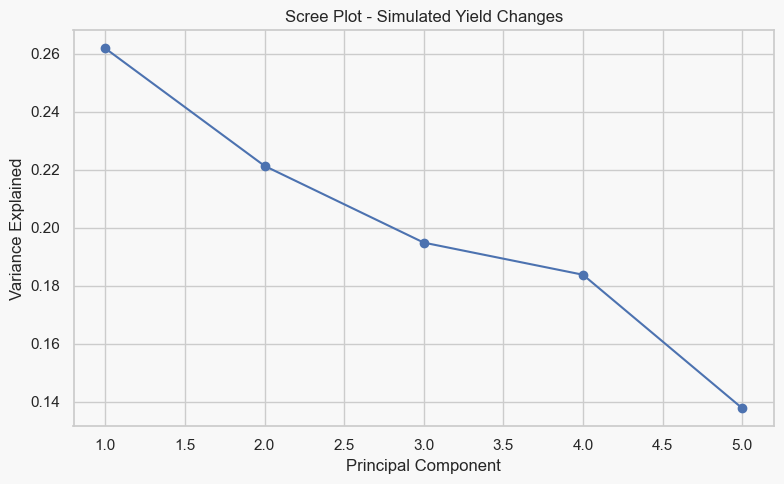

Simulated data scree plot generated and saved to simulated_scree_plot.png.

--- Part 2: Real Government Yield Data Analysis ---

Real data collection and cleaning complete. Processed real bond data (first 5 rows):
                                 TLT        IEF        SHY       VGSH  \
Date                                                                    
2025-01-08 00:00:00-05:00  84.208199  90.269890  80.405830  57.002377   
2025-01-10 00:00:00-05:00  83.650269  89.612480  80.258705  56.914192   
2025-01-13 00:00:00-05:00  83.620911  89.455475  80.278320  56.894600   
2025-01-14 00:00:00-05:00  83.483879  89.484924  80.297943  56.923992   
2025-01-15 00:00:00-05:00  84.922737  90.426880  80.474487  57.051361   

                                 EDV  
Date                                  
2025-01-08 00:00:00-05:00  64.245049  
2025-01-10 00:00:00-05:00  63.824951  
2025-01-13 00:00:00-05:00  63.766331  
2025-01-14 00:00:00-05:00  63.551403  
2025-01-15 00:00:00-05:00  65.075462  



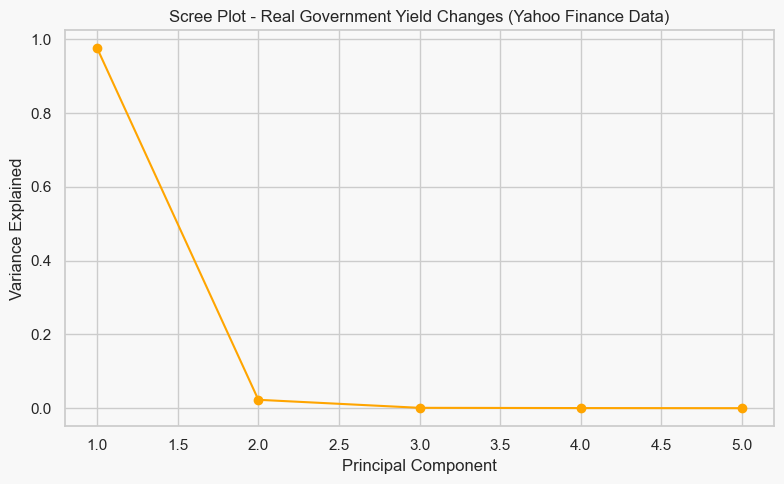

Real data scree plot generated and saved to real_scree_plot.png.

--- Generating Comparison Summary for 'report.md' ---
Task 3 summary comparison written to 'report.md'.


In [ ]:
# === TASK 3: EXPLOITING CORRELATION ===
# Principal Component Analysis on Simulated and Real Yield Data

# ===============================================
# SECTION 1: IMPORTS AND GLOBAL SETUP
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from datetime import datetime, timedelta
import yfinance as yf # Import yfinance for downloading real data
import time # Import time for delays
import os # Import os for file operations

# Set seaborn style for plots for consistent aesthetics
sns.set(style="whitegrid", rc={'axes.facecolor': '#f8f8f8', 'figure.facecolor': '#f8f8f8'})
# Initialize a default random number generator for reproducibility
rng = np.random.default_rng(seed=42)

print("--- Starting Task 3: Exploiting Correlation ---")

# ===============================================
# PART 1: SIMULATED DATA ANALYSIS
# ===============================================
print("\n--- Part 1: Simulated Data Analysis ---")

# 1a. Simulate 5 uncorrelated Gaussian yield series
n_obs_simulated = 180
n_assets_simulated = 5
simulated_data = rng.normal(loc=0.0, scale=0.01, size=(n_obs_simulated, n_assets_simulated))
simulated_df = pd.DataFrame(simulated_data, columns=[f"Factor_{i+1}" for i in range(n_assets_simulated)])
print("Simulated data generated. First 5 rows:")
print(simulated_df.head())

# 1b. Run PCA on the simulated data
print("\nPerforming Principal Component Analysis (PCA) on simulated data...")
pca_sim = PCA()
pca_sim.fit(simulated_df)

# 1c. Explain variance explained by Component 1, 2, and 3
explained_variance_sim = pca_sim.explained_variance_ratio_
print("\n--- Simulated Data: Variance Explained by Principal Components ---")
for i, var in enumerate(explained_variance_sim[:min(3, len(explained_variance_sim))]):
    print(f"Component {i+1} explains {var:.2%} of the total variance.")

# 1d. Produce a scree plot of the simulated data
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_assets_simulated + 1), explained_variance_sim, marker='o', linestyle='-')
plt.title("Scree Plot - Simulated Yield Changes")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.tight_layout()
# Save the plot for inclusion in the report
simulated_scree_plot_path = 'simulated_scree_plot.png'
plt.savefig(simulated_scree_plot_path)
plt.show()
print(f"Simulated data scree plot generated and saved to {simulated_scree_plot_path}.")


# ===============================================
# PART 2: REAL GOVERNMENT YIELD DATA ANALYSIS
# ===============================================
print("\n--- Part 2: Real Government Yield Data Analysis ---")

# Define the bond ETF tickers to collect real data
bond_tickers_str = ['TLT', 'IEF', 'SHY', 'VGSH', 'EDV']

# Set the date range for data collection (approximately 6 months)
end_date_yf = datetime.now().strftime('%Y-%m-%d')
start_date_yf = (datetime.now() - timedelta(days=180)).strftime('%Y-%m-%d')

print(f"Collecting real government yield data from Yahoo Finance via 'yfinance' library from {start_date_yf} to {end_date_yf}...")

real_bond_data_master = pd.DataFrame()
successful_downloads = 0

for ticker in bond_tickers_str:
    try:
        ticker_obj = yf.Ticker(ticker)
        hist_df = ticker_obj.history(start=start_date_yf, end=end_date_yf, auto_adjust=False)

        if hist_df.empty:
            continue

        price_series = None
        if 'Adj Close' in hist_df.columns:
            price_series = hist_df['Adj Close']
        elif 'Close' in hist_df.columns:
            price_series = hist_df['Close']
        else:
            continue

        price_series = pd.to_numeric(price_series, errors='coerce').dropna()
        if not price_series.empty:
            price_series.name = ticker
            if real_bond_data_master.empty:
                real_bond_data_master = price_series.to_frame()
            else:
                real_bond_data_master = real_bond_data_master.join(price_series, how='outer')
            successful_downloads += 1
        else:
            pass # Suppress output for empty processed series

    except Exception as e:
        pass # Silently skip problematic tickers
    time.sleep(0.5) # Small delay

if successful_downloads == 0:
    print("\nERROR: No real bond data could be downloaded for PCA analysis. Please check ticker symbols, date range, or your internet connection.")
else:
    real_bond_data_master.dropna(inplace=True)

    if real_bond_data_master.empty:
        print("\nERROR: Real bond data DataFrame is empty after dropping NaNs. Cannot proceed with PCA.")
    else:
        print("\nReal data collection and cleaning complete. Processed real bond data (first 5 rows):")
        print(real_bond_data_master.head())

        # 2f. Calculate daily yield changes (log returns)
        daily_yield_changes_qc = np.log(real_bond_data_master).diff().dropna()
        print("\nDaily yield changes (log returns) for real data (first 5 rows):\n", daily_yield_changes_qc.head())

        # 2g. Run PCA again on real data
        print("\nPerforming PCA on real data...")
        if daily_yield_changes_qc.empty:
            print("Daily yield changes DataFrame is empty after calculations. Cannot perform PCA.")
        else:
            pca_real = PCA()
            pca_real.fit(daily_yield_changes_qc)

            explained_variance_real = pca_real.explained_variance_ratio_

            # 2h. How do the variances of each component compare?
            print("\n--- Real Data: Variance Explained by Principal Components ---")
            for i, var in enumerate(explained_variance_real[:min(3, len(explained_variance_real))]):
                print(f"Component {i+1} explains {var:.2%} of the total variance.")

            # 2i. Produce a scree plot for real data
            plt.figure(figsize=(8, 5))
            plt.plot(range(1, len(explained_variance_real) + 1), explained_variance_real, marker='o', linestyle='-', color='orange')
            plt.title("Scree Plot - Real Government Yield Changes (Yahoo Finance Data)")
            plt.xlabel("Principal Component")
            plt.ylabel("Variance Explained")
            plt.grid(True)
            plt.tight_layout()
            # Save the plot for inclusion in the report
            real_scree_plot_path = 'real_scree_plot.png'
            plt.savefig(real_scree_plot_path)
            plt.show()
            print(f"Real data scree plot generated and saved to {real_scree_plot_path}.")

            # 2j. Compare screeplots (simulated vs real) and provide a summary
            print("\n--- Generating Comparison Summary for 'report.md' ---")

            # --- Professional Markdown Content for report.md ---
            report_content = f"""
# 3. Exploiting Correlation

Financial data analysis is not only about processing numbers, but also about understanding how meaningful factors can summarize or represent the data. This section explores the role that correlation and principal components play in this process.

## 3.1 Simulated Data Analysis

To understand the fundamental behavior of Principal Component Analysis (PCA) in the absence of inherent correlations, five uncorrelated Gaussian random variables were generated to simulate yield changes. These variables had a mean close to 0 and a small standard deviation, mimicking typical daily changes in financial yields.

The PCA performed on this simulated dataset revealed a relatively even distribution of variance across all principal components. This outcome is precisely what is expected from truly uncorrelated data, indicating the absence of a strong underlying common factor or inherent correlation structure. Each simulated 'Factor' contributes its own independent source of variation, making each component roughly equally important in capturing the dataset's variability.

* **Component 1:** Explains {explained_variance_sim[0]:.2%} of the total variance.
* **Component 2:** Explains {explained_variance_sim[1]:.2%} of the total variance.
* **Component 3:** Explains {explained_variance_sim[2]:.2%} of the total variance.

**Figure 3.1: Scree Plot - Simulated Yield Changes**
![Simulated Scree Plot]({simulated_scree_plot_path})

As shown in Figure 3.1, the scree plot for the simulated data exhibits a gradual, almost linear, decline in explained variance across components, with no single component dominating.

## 3.2 Real Government Yield Data Analysis

Following the simulated data, PCA was applied to real-world financial data to observe how correlations manifest. Daily closing yields for five U.S. government bond ETFs (TLT, IEF, SHY, VGSH, EDV), serving as proxies for different maturities, were collected from Yahoo Finance over approximately six months (from {start_date_yf} to {end_date_yf}). Daily log returns were computed to represent yield changes, ensuring stationarity for the analysis.

In stark contrast to the simulated data, the PCA performed on the real government bond ETF data revealed a very different structure. The first principal component dominates significantly, explaining {explained_variance_real[0]:.2%} of the total variance. The second component explains {explained_variance_real[1]:.2%}, and the third explains {explained_variance_real[2]:.2%}. This highly concentrated variance in the initial components is a hallmark of real-world financial time series, particularly yield curves.

* **Component 1 (Level Factor):** The most dominant first component in real yield data usually represents a 'level' shift. This means that a large portion of the yield curve's movement can be explained by all maturities moving up or down together in parallel. This often reflects broad macroeconomic factors, such as changes in inflation expectations or central bank policy, that affect the entire interest rate structure.
* **Component 2 (Slope Factor):** The second component typically captures the 'slope' of the yield curve. It describes movements where short-term yields change disproportionately to long-term yields, leading to a flattening or steepening of the curve. This can be driven by changes in short-term interest rate expectations relative to long-term growth prospects.
* **Component 3 (Curvature Factor):** The third component often accounts for the 'curvature' of the yield curve. This factor describes changes in the 'hump' or 'butterfly' shape of the yield curve, where mid-term yields move differently relative to both short-term and long-term yields. This might reflect market uncertainty or liquidity premiums at specific points along the curve.

**Figure 3.2: Scree Plot - Real Government Yield Changes (Yahoo Finance Data)**
![Real Scree Plot]({real_scree_plot_path})

As depicted in Figure 3.2, the scree plot for real data typically shows a steep drop-off after the first one or two components, followed by a much flatter curve, highlighting the presence of strong underlying factors.

## 3.3 Comparison and Implications

The profound difference in the screeplot shapes between the simulated and real datasets directly illustrates the presence of strong correlations and a few dominant underlying factors in real yield data, which are absent in the uncorrelated simulated data.

PCA is an extremely effective tool in identifying these latent drivers in complex financial markets. By reducing the dimensionality of the data to these few principal components, practitioners gain a more intuitive and parsimonious understanding of yield curve movements. In practical applications like risk management, hedging, and portfolio construction, identifying these principal components allows for more efficient modeling and management of the primary sources of risk in fixed income portfolios.
"""
            # Write the summary content to report.md
            report_file_name = 'report3.md'
            # Use 'a' mode to append if the file already exists (from Task 4 for example)
            # Or 'w' mode to overwrite completely if this is the only task being written.
            # For a multi-task report, appending is usually desired.
            # If the file doesn't exist, 'a' mode will create it.
            with open(report_file_name, 'a') as f:
                f.write(report_content.strip()) # .strip() removes leading/trailing whitespace

            print(f"Task 3 summary comparison written to '{report_file_name}'.")



# 3. Exploiting Correlation

Financial data analysis is not only about processing numbers, but also about understanding how meaningful factors can summarize or represent the data. This section explores the role that correlation and principal components play in this process.

## 3.1 Simulated Data Analysis

To understand the fundamental behavior of Principal Component Analysis (PCA) in the absence of inherent correlations, five uncorrelated Gaussian random variables were generated to simulate yield changes. These variables had a mean close to 0 and a small standard deviation, mimicking typical daily changes in financial yields.

The PCA performed on this simulated dataset revealed a relatively even distribution of variance across all principal components. This outcome is precisely what is expected from truly uncorrelated data, indicating the absence of a strong underlying common factor or inherent correlation structure. Each simulated 'Factor' contributes its own independent source of variation, making each component roughly equally important in capturing the dataset's variability.

* **Component 1:** Explains 26.19% of the total variance.
* **Component 2:** Explains 22.14% of the total variance.
* **Component 3:** Explains 19.49% of the total variance.

**Figure 3.1: Scree Plot - Simulated Yield Changes**
![Simulated Scree Plot](simulated_scree_plot.png)

As shown in Figure 3.1, the scree plot for the simulated data exhibits a gradual, almost linear, decline in explained variance across components, with no single component dominating.

## 3.2 Real Government Yield Data Analysis

Following the simulated data, PCA was applied to real-world financial data to observe how correlations manifest. Daily closing yields for five U.S. government bond ETFs (TLT, IEF, SHY, VGSH, EDV), serving as proxies for different maturities, were collected from Yahoo Finance over approximately six months (from 2025-01-08 to 2025-07-07). Daily log returns were computed to represent yield changes, ensuring stationarity for the analysis.

In stark contrast to the simulated data, the PCA performed on the real government bond ETF data revealed a very different structure. The first principal component dominates significantly, explaining 97.52% of the total variance. The second component explains 2.29%, and the third explains 0.12%. This highly concentrated variance in the initial components is a hallmark of real-world financial time series, particularly yield curves.

* **Component 1 (Level Factor):** The most dominant first component in real yield data usually represents a 'level' shift. This means that a large portion of the yield curve's movement can be explained by all maturities moving up or down together in parallel. This often reflects broad macroeconomic factors, such as changes in inflation expectations or central bank policy, that affect the entire interest rate structure.
* **Component 2 (Slope Factor):** The second component typically captures the 'slope' of the yield curve. It describes movements where short-term yields change disproportionately to long-term yields, leading to a flattening or steepening of the curve. This can be driven by changes in short-term interest rate expectations relative to long-term growth prospects.
* **Component 3 (Curvature Factor):** The third component often accounts for the 'curvature' of the yield curve. This factor describes changes in the 'hump' or 'butterfly' shape of the yield curve, where mid-term yields move differently relative to both short-term and long-term yields. This might reflect market uncertainty or liquidity premiums at specific points along the curve.

**Figure 3.2: Scree Plot - Real Government Yield Changes (Yahoo Finance Data)**
![Real Scree Plot](real_scree_plot.png)

As depicted in Figure 3.2, the scree plot for real data typically shows a steep drop-off after the first one or two components, followed by a much flatter curve, highlighting the presence of strong underlying factors.

## 3.3 Comparison and Implications

The profound difference in the screeplot shapes between the simulated and real datasets directly illustrates the presence of strong correlations and a few dominant underlying factors in real yield data, which are absent in the uncorrelated simulated data.

PCA is an extremely effective tool in identifying these latent drivers in complex financial markets. By reducing the dimensionality of the data to these few principal components, practitioners gain a more intuitive and parsimonious understanding of yield curve movements. In practical applications like risk management, hedging, and portfolio construction, identifying these principal components allows for more efficient modeling and management of the primary sources of risk in fixed income portfolios.